In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [43]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [48]:
!pip install geopy
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


**Remove continents which have only one country in dataframe.**


In [21]:
single = world['continent'].value_counts().to_frame(name = "single").query("single == 1")
single

,single
Seven seas (open ocean),1
Antarctica,1


In [13]:
single = world['continent'].value_counts()
continents_single = single[single.values == 1].keys()
df2 = world[~(world['continent'] == continents_single.values[0])]
df3 = df2[~(df2['continent'] == continents_single.values[1])]
print (df3['continent'].value_counts())
df3

Africa           51
Asia             47
Europe           39
North America    18
South America    13
Oceania           7
Name: continent, dtype: int64


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [31]:
world_filtered = df3.groupby('continent').apply(lambda x: x.sort_values('pop_est', ascending=False).head(3))

**Print the 'world_filtered' dataframe.**

In [39]:
world_filtered.reset_index( drop = True)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50..."
1,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.789 8.003, 44.964 5.002, 43.661 4..."
2,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.866 22.000, 32.900 22.000, 29.020..."
3,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508..."
4,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052..."
5,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859..."
6,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
7,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.120 53.757, 14.353 53.248, 14.075..."
8,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
9,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."


-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

<AxesSubplot:>

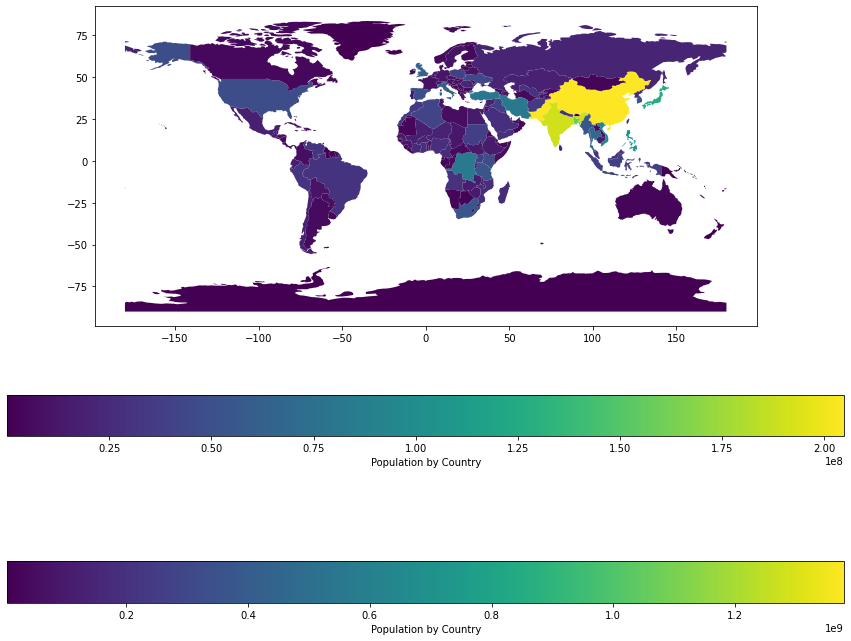

In [46]:
# create figure and axes
fig, ax = plt.subplots(figsize=(15,12))


# create map from world_filtered data-frame

world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})


# add the rest of the countries
world[~world.name.isin(world_filtered.name)].plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

### Plotly

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

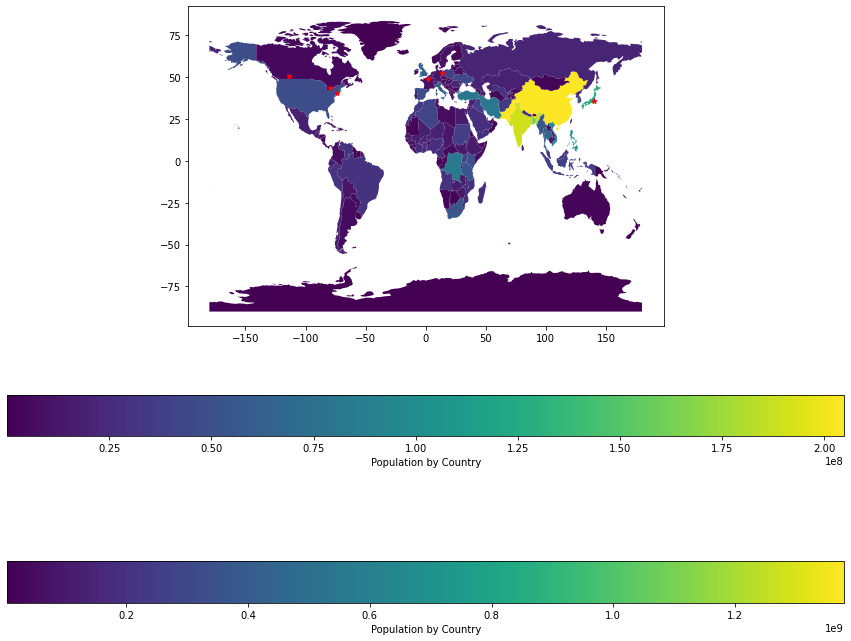

In [57]:
# get geometry
cities = gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'],provider = "nominatim",user_agent = "autogis_xx")

# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))



# create map from world_filtered data-frame

world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})


# add the rest of the countries
world[~world.name.isin(world_filtered.name)].plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})


# add cities
cities.plot(ax=ax ,marker='*', color='red', markersize=25)
plt.show()